# Лабораторна робота #1

## Завдання 1
### Реалізувати операцію згортки для матриці з нуля за допомогою NumPy

In [1]:
import numpy as np

# Створити матрицю з довільними значеннями
def fill_array(row=4, col=4):
    return np.random.randint(50, size=(row,col))
    
# Виконати згортку над матрицею `arr`
def convolve(arr, row=4, col=4):
    kernel = np.matrix([[1, 0], [0, 1]]) # ядро згортки
    kernel_row = kernel_col = 2

    output_row = row - kernel_row + 1
    output_col = col - kernel_col + 1
    
    output = np.zeros((output_row, output_col), dtype="int")
    print(arr, "\n")
    
    for i in range(0, output_row):
        for j in range(0, output_col):
            output[i][j] = np.sum(np.multiply(arr[i:i+kernel_col,j:j+kernel_row], kernel))
    return output

arr = fill_array()
result = convolve(arr)
print(result)

[[34 18 39 36]
 [10 42 26 26]
 [14 45 10  7]
 [28 12 47 13]] 

[[76 44 65]
 [55 52 33]
 [26 92 23]]


## Завдання 2
### Обрати будь-яке кольорове зображення. Зчитати його за допомогою бiблiотеки cv2 командою cv2.imread.

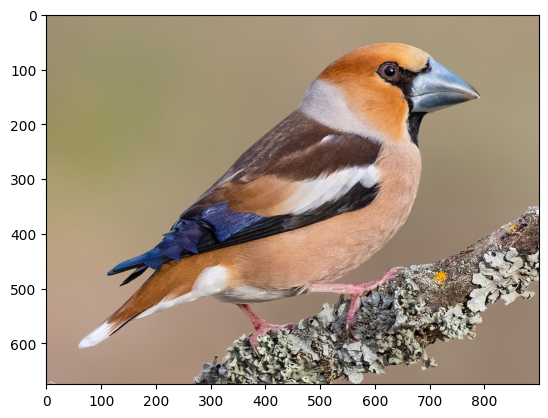

In [10]:
import cv2 as cv
from matplotlib import pyplot as plt

def_img = cv.imread("hawfinch.jpg")
img = cv.cvtColor(def_img, cv.COLOR_BGR2RGB)
plt.imshow(img)

plt.show()

## Завдання 3
### Застосувати до зображення фiльтр Гаусса, box-фiльтр, unsharp masking. Вiзуалiзувати результати.

### Фільтр Гаусса

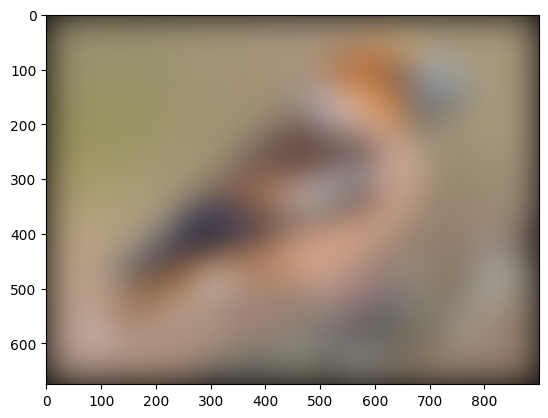

In [5]:
import torch
import torch.nn as nn
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

def gaussian_kernel(size, sigma):
    coords = torch.arange(size).float() # Заповнити значеннями 0:size
    coords -= size // 2 # Центрувати значення від -size до 0 до +size
    gauss = torch.exp(-(coords**2) / (2 * sigma**2)) # 1-вимірна функція Гаусса
    gauss /= gauss.sum() # Нормалізувати значення 1/sum
    gauss = gauss.outer(gauss) # Створити матрицю 
    print(gauss)
    return gauss

def gaussian_kernel_2d(size, sigma):
    # Create a coordinate grid of shape (size, size, 2)
    x = torch.arange(size).float().reshape(1, -1).repeat(size, 1) - size // 2
    y = torch.arange(size).float().reshape(-1, 1).repeat(1, size) - size // 2
    xy_grid = torch.stack([x, y], dim=-1)
    
    squared_dist = (xy_grid**2).sum(dim=-1) # Дистанція від центру
    gauss = torch.exp(-squared_dist / (2.0 * sigma**2)) # 2-вимірна функція Гаусса
    gauss /= gauss.sum() # Нормалізувати значення 1/sum
    return gauss


# Завантаження зображення та конвертація його в тензор PyTorch
img = cv.imread("hawfinch.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Перетворення та нормалізація значень до діапазону [0, 1]
img_tensor = torch.tensor(img, dtype=torch.float32).permute(2, 0, 1) / 255.0
img_tensor = img_tensor.unsqueeze(0)

fltr_size = 201
sigma = fltr_size / 6

# Generate the Gaussian kernel
gaussian_filter = gaussian_kernel_2d(fltr_size, sigma)
gaussian_filter = gaussian_filter.expand(3, 1, fltr_size, fltr_size)

conv = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=fltr_size, stride=1, padding=fltr_size//2, groups=3)
conv.weight = nn.Parameter(gaussian_filter)
conv.bias = nn.Parameter(torch.zeros(3))

fltr_tensor = conv(img_tensor)
fltr_img = fltr_tensor.squeeze(0).permute(1, 2, 0).detach().numpy()

plt.imshow(fltr_img)
plt.show()


### Box-фільтр

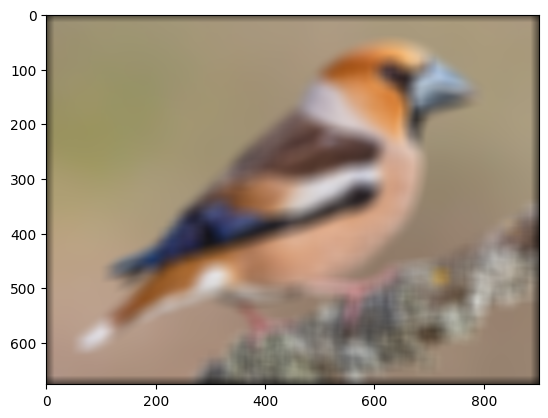

In [2]:
import torch
import torch.nn as nn
import cv2 as cv
from matplotlib import pyplot as plt

# Завантаження зображення та конвертація його в тензор PyTorch
img = cv.imread("hawfinch.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Перетворення та нормалізація значень до діапазону [0, 1]
img_tensor = torch.tensor(img, dtype=torch.float32).permute(2, 0, 1) / 255.0
img_tensor = img_tensor.unsqueeze(0)

fltr_size = 30

# Тензор із значеннями: box-filter
fltr_tensor = torch.full((3, 1, fltr_size, fltr_size), 1.0/(fltr_size**2))

conv = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=fltr_size, stride=1, padding=fltr_size//2, groups=3)
conv.weight = nn.Parameter(fltr_tensor)
conv.bias = nn.Parameter(torch.zeros(3))

fltr_tensor = conv(img_tensor)
fltr_img = fltr_tensor.squeeze(0).permute(1, 2, 0).detach().numpy()

plt.imshow(fltr_img)

### Unsharp masking 

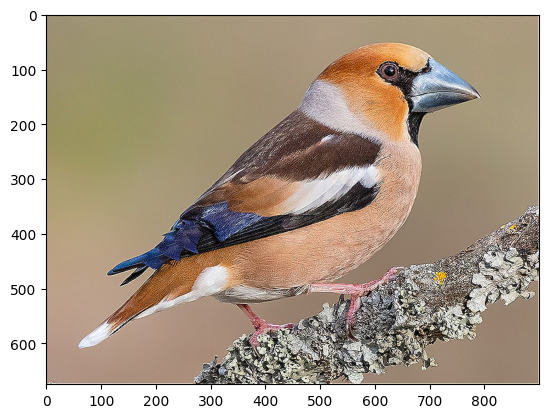

In [15]:
import torch
import torch.nn as nn
import cv2 as cv
from matplotlib import pyplot as plt

# Завантаження зображення та конвертація його в тензор PyTorch
img = cv.imread("hawfinch.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Перетворення та нормалізація значень до діапазону [0, 1]
img_tensor = torch.tensor(img, dtype=torch.float32).permute(2, 0, 1) / 255.0
img_tensor = img_tensor.unsqueeze(0)

fltr_size = 3

# Тензор із значеннями: unsharp masking
fltr_tensor = torch.tensor([[0., -1., 0.],[-1., 5., -1.],[0., -1., 0.]])
fltr_tensor = fltr_tensor.unsqueeze(0).repeat(3, 1, 1).unsqueeze(1)

conv = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=fltr_size, stride=1, padding=fltr_size//2, groups=3)
conv.weight = nn.Parameter(fltr_tensor)
conv.bias = nn.Parameter(torch.zeros(3))

fltr_tensor = conv(img_tensor)
fltr_img = fltr_tensor.squeeze(0).permute(1, 2, 0).clamp(0,1).detach().numpy()

plt.imshow(fltr_img)

## Завдання 4

### Min-max нормалізація зображення

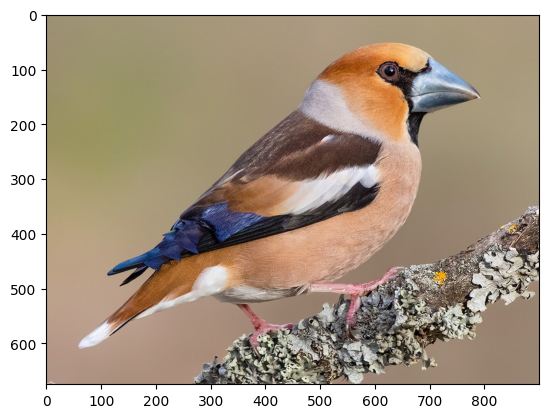

In [2]:
import torch
import torch.nn as nn
import cv2 as cv
from matplotlib import pyplot as plt

# Завантаження зображення та конвертація його в тензор PyTorch
img = cv.imread("hawfinch.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Перетворення та нормалізація значень до діапазону [0, 1]
img_tensor = torch.tensor(img, dtype=torch.float32).permute(2, 0, 1) / 255.0
img_tensor = img_tensor.unsqueeze(0)

min_val = img_tensor.min()
max_val = img_tensor.max()
normalized_tensor = (img_tensor - min_val) / (max_val - min_val)
normalized_img = normalized_tensor.squeeze(0).permute(1, 2, 0).detach().numpy()

plt.imshow(normalized_img)


### Z-score нормалізація зображення

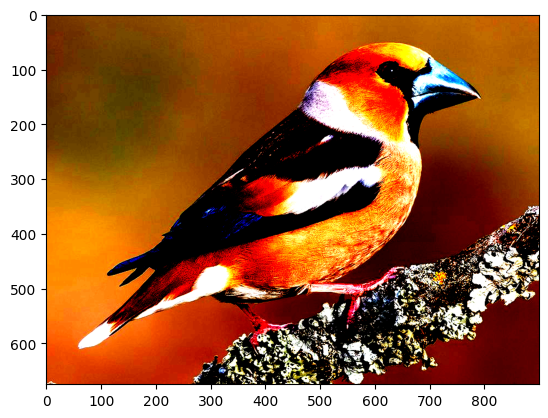

In [25]:
import torch
import torch.nn as nn
import cv2 as cv
from matplotlib import pyplot as plt

# Завантаження зображення та конвертація його в тензор PyTorch
img = cv.imread("hawfinch.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Перетворення та нормалізація значень до діапазону [0, 1]
img_tensor = torch.tensor(img, dtype=torch.float32).permute(2, 0, 1) / 255.0
img_tensor = img_tensor.unsqueeze(0)

img_mean = img_tensor.mean()
img_std = img_tensor.std()
normalized_tensor = (img_tensor - img_mean) /img_std
normalized_img = normalized_tensor.squeeze(0).permute(1, 2, 0).clamp(0,1).detach().numpy()

plt.imshow(normalized_img)
